# E-Commerce-Product-Delivery-Prediction

# Context
### This project aims to understand the product delivery patterns and customer behavior to optimize delivery performance and enhance customer satisfaction for an international e-commerce company specializing in electronic products


# Data Description

### The dataset comprises 10999 observations across 12 variables, detailing customer interactions, product characteristics, and delivery outcomes. Key variables include:
#### -Warehouse block,                                                                                              .
#### -Mode of shipment,                                                                                           .
#### -Customer care calls,                                                                            .
#### -Product cost, 
#### -Prior purchases, 
#### -Product importance, 
#### -Delivery performance (target variable)

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

## Step 2: Loading the dataset

In [2]:
data= pd.read_csv("E_Commerce.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Step 3: Data Preprocessing & EDA

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [5]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
data.shape

(10999, 12)

In [7]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
data = data.drop(['ID'], axis=1)

Text(0.5, 1.0, 'Discount Offered vs Reached on Time')

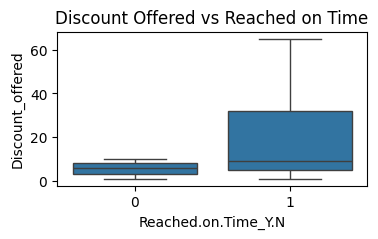

In [10]:
## Box plot to visualize the distribution of a discounted offer to target.
plt.figure(figsize=(4,2))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=data) # pallete is by default for color
plt.title("Discount Offered vs Reached on Time")


Text(0.5, 1.0, 'Delivery Time vs Cost of the Product')

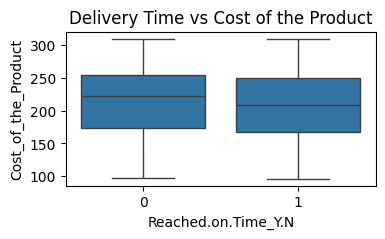

In [11]:
plt.figure(figsize=(4,2))
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', data=data)
plt.title('Delivery Time vs Cost of the Product')

Text(0.5, 1.0, 'Weight vs Reached on Time')

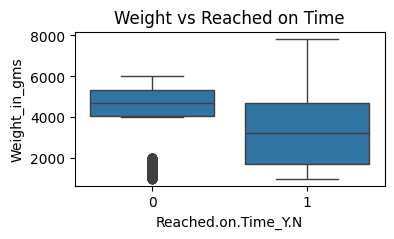

In [12]:
plt.figure(figsize=(4,2))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=data)
plt.title("Weight vs Reached on Time")

Text(0.5, 1.0, 'Delivery Time vs Customer Care Calls')

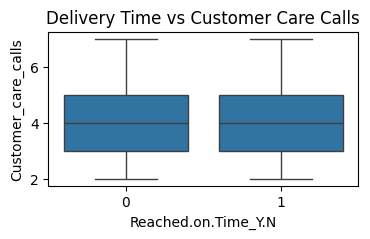

In [13]:
plt.figure(figsize=(4,2))
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=data)
plt.title('Delivery Time vs Customer Care Calls')

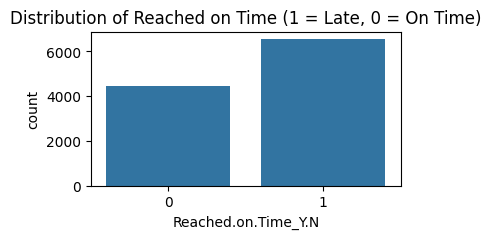

In [14]:
# Plot target variable distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title('Distribution of Reached on Time (1 = Late, 0 = On Time)')
plt.show()

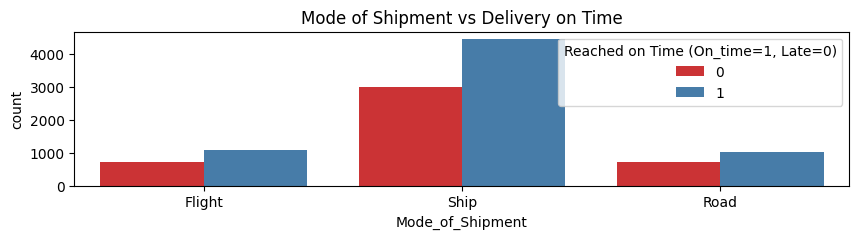

In [15]:
# Countplot to visualize shipment methods and delays
plt.figure(figsize=(10,2))
sns.countplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N', data=data, palette='Set1')
plt.title('Mode of Shipment vs Delivery on Time')
plt.legend(title='Reached on Time (On_time=1, Late=0)')
plt.show()

In [16]:
# Selecting only numerical columns from the DataFrame
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the numerical data
numerical_data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


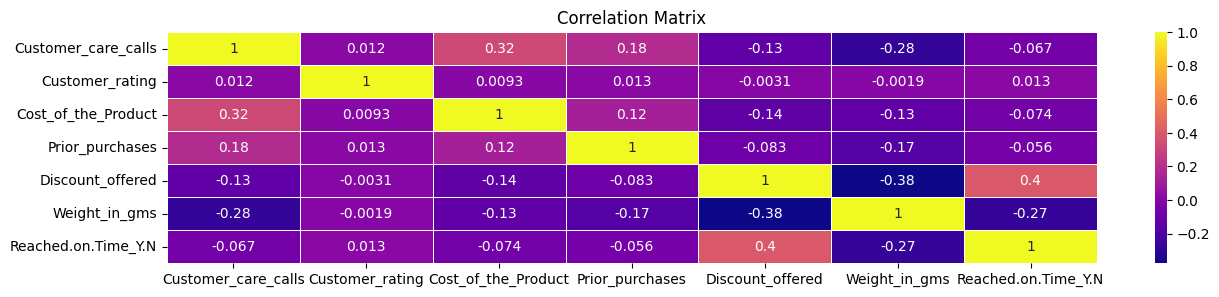

In [17]:
# Correlation matrix for numerical variables
plt.figure(figsize=(15, 3))
correlation_matrix = numerical_data.corr()

# Heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 4: Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing 
 
- Random Forest, 
- Decision tree,
- Logistic Regression,
- K-Nearest neighour, 


and compare them

In [18]:
# Label encoding categorical features
le = LabelEncoder()

# Assuming 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', and 'Gender' are categorical
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


In [19]:
# Assuming 'Reached.on.Time_Y.N' is the target variable and other columns are features
X = data.drop(columns=['Reached.on.Time_Y.N'])
y = data['Reached.on.Time_Y.N']

### 1. RANDOM FOREST MODEL

In [20]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [21]:
importances = model.feature_importances_    # Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) # Sort the feature importances
print(feature_importances)

               Feature  Importance
9        Weight_in_gms    0.303273
8     Discount_offered    0.206483
4  Cost_of_the_Product    0.176701
0      Warehouse_block    0.058117
3      Customer_rating    0.057323
2  Customer_care_calls    0.055660
5      Prior_purchases    0.053676
6   Product_importance    0.032010
1     Mode_of_Shipment    0.031748
7               Gender    0.025009


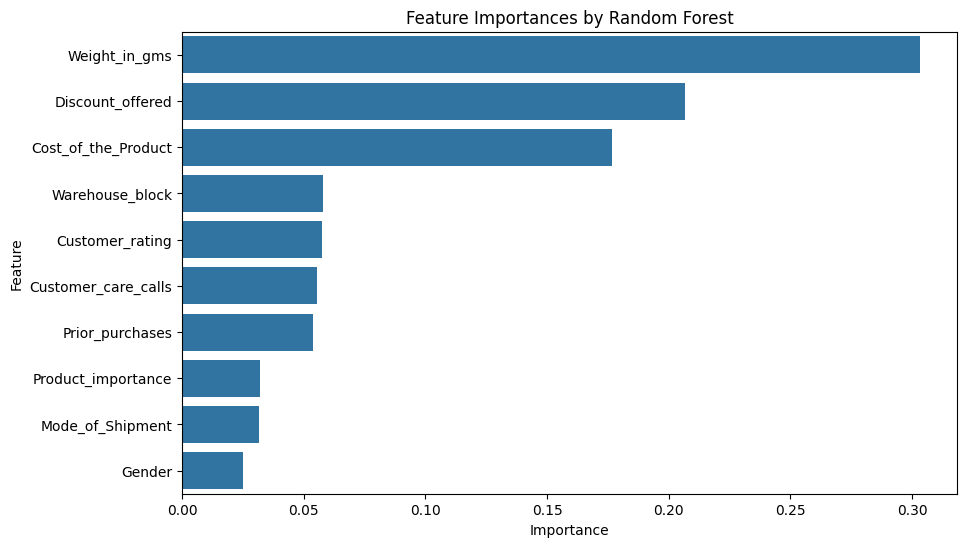

In [22]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances by Random Forest')
plt.show()

##### by above analysis we can conclude the important features for target variable 
##### Imp features: weight_in_gms, discount_offered,cost_of the product,warehouse_block, customer_rating, customer_care_calls, prior purchase

In [23]:
#dropping coloumns by keeping important columns
data_updated = data.drop(columns=['Gender', 'Mode_of_Shipment', 'Product_importance'])
data_updated.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,4,2,177,3,44,1233,1
1,4,4,5,216,2,59,3088,1
2,0,2,2,183,4,48,3374,1
3,1,3,3,176,4,10,1177,1
4,2,2,2,184,3,46,2484,1


In [24]:
# Again selectting the features and target according to updated data
X = data_updated.drop(columns=['Reached.on.Time_Y.N'])  # Features
y = data_updated['Reached.on.Time_Y.N']  # Target

In [25]:
data_updated.columns

Index(['Warehouse_block', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N'],
      dtype='object')

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Define a few important hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [10, None],           # Depth of each tree
    'min_samples_split': [2, 5],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2]          # Minimum samples in a leaf
}

In [28]:
# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [29]:
# Use GridSearchCV to search for the best hyperparameters
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=3, verbose=1, n_jobs=-1)  # n_jobs=-1 uses all cores for parallel computation

# Fit the model on training data
rf_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

In [30]:
# Get the best parameters found
best_params = rf_grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred_rf = best_rf.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.6854545454545454
Confusion Matrix:
 [[783 112]
 [580 725]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.87      0.69       895
           1       0.87      0.56      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.72      0.69      2200
weighted avg       0.75      0.69      0.68      2200



### 2. DECISION TREE MODEL 

In [32]:
#dtm--> decision tree model
dtm = DecisionTreeClassifier(random_state=42)
dtm

DecisionTreeClassifier(random_state=42)

In [33]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
# Perform Grid Search with cross-validation (e.g., K=5)
grid_search = GridSearchCV(estimator=dtm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [35]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [36]:
best_dtm = DecisionTreeClassifier(random_state=42, **best_params)
best_dtm.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [37]:
print(f"Best Hyperparameters: {best_params}")
y_pred_dtm = best_dtm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dtm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtm))
print("Classification Report:\n", classification_report(y_test, y_pred_dtm))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6768181818181818
Confusion Matrix:
 [[729 166]
 [545 760]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.81      0.67       895
           1       0.82      0.58      0.68      1305

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200



### 3. LOGISTIC REGRESSION / CLASSIFICATION

In [38]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Make predictions on the test set
y_pred_LR = LR.predict(X_test)

In [40]:
# Generate a classification report


print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Precision", precision_score(y_test, y_pred_LR))
print("RECALL", recall_score(y_test, y_pred_LR))
print("F1 score", f1_score(y_test, y_pred_LR))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LR))
print("Classification Report:\n", classification_report(y_test, y_pred_LR))


Accuracy: 0.6372727272727273
Precision 0.693955623565417
RECALL 0.6950191570881226
F1 score 0.6944869831546707
Confusion Matrix:
 [[495 400]
 [398 907]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.70      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



### 4. K-NEAREST NEIGHBOUR

In [41]:
# Function to choose the value of k
def choose_k(X_train, y_train, X_test, y_test, max_k=10):
    k_values = list(range(1, max_k+1))
    accuracy_values = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    
    # Visualize the accuracy for different k values
    plt.figure(figsize=(5, 3))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k = k_values[accuracy_values.index(max(accuracy_values))]
    return best_k

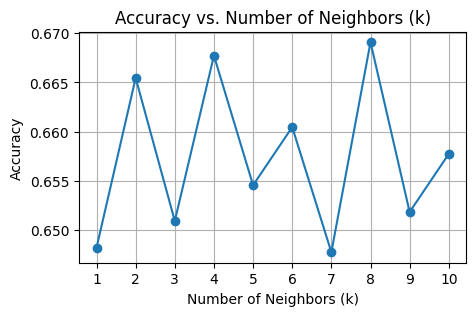

Best k: 8


In [42]:
# Choose the best k value
best_k = choose_k(X_train, y_train, X_test, y_test)
print("Best k:", best_k)

#### the best k is 8

#### Create and train the KNN model with the best k

In [43]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
y_pred_knn = knn.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.6690909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.74      0.65       895
           1       0.78      0.62      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.67      2200



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11344\2937203019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y= accuracy, palette= 'magma').set_title("Models Comparision ")


Text(0, 0.5, 'Accuracy')

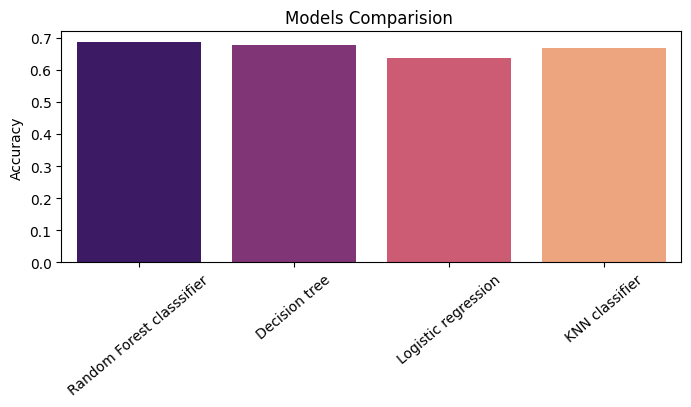

In [46]:
models= ["Random Forest classsifier","Decision tree","Logistic regression", "KNN classifier" ]
accuracy=[accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dtm) ,accuracy_score(y_test, y_pred_LR) ,accuracy_score(y_test, y_pred_knn), ]
plt.figure(figsize=(8,3))
sns.barplot(x=models, y= accuracy, palette= 'magma').set_title("Models Comparision ")
plt.xticks(rotation=40)
plt.ylabel("Accuracy")

### MODEL SAVING

In [47]:
import pickle

# Save the model using pickle
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("Saving the model as  RF_model.pkl")

Saving the model as  RF_model.pkl
